In [3]:
import intrasom
from utilidades import *
import warnings
warnings.filterwarnings('ignore')

# Results Clustering and Plotting Modules
from intrasom.visualization import PlotFactory
from intrasom.clustering import ClusterFactory

In [4]:
X_syn_ctrl, y_syn_ctrl, syn_ctrl_target_names = get_synthetic_control_data()

In [8]:
mapsize = (24,14)
som_syn_ctrl = intrasom.SOMFactory.build(X_syn_ctrl,
                                        mapsize=mapsize,
                                        mapshape='planar',
                                        lattice='hexa',
                                        normalization='var',
                                        initialization='random',
                                        neighborhood='gaussian',
                                        training='batch',
                                        name='Example')

som_syn_ctrl.train(train_len_factor=2)

Loading dataframe...
Normalizing data...
Creating neighborhood...
Initializing map...


Creating Neuron Distance Rows:   0%|          | 0/336 [00:00<?, ? Neurons/s]

Starting Training...
Rough Training:


  0%|          | 0/34 [00:00<?, ?it/s]

Fine Tuning:


  0%|          | 0/58 [00:00<?, ?it/s]

Saving...
Training Report Created
Training completed successfully.


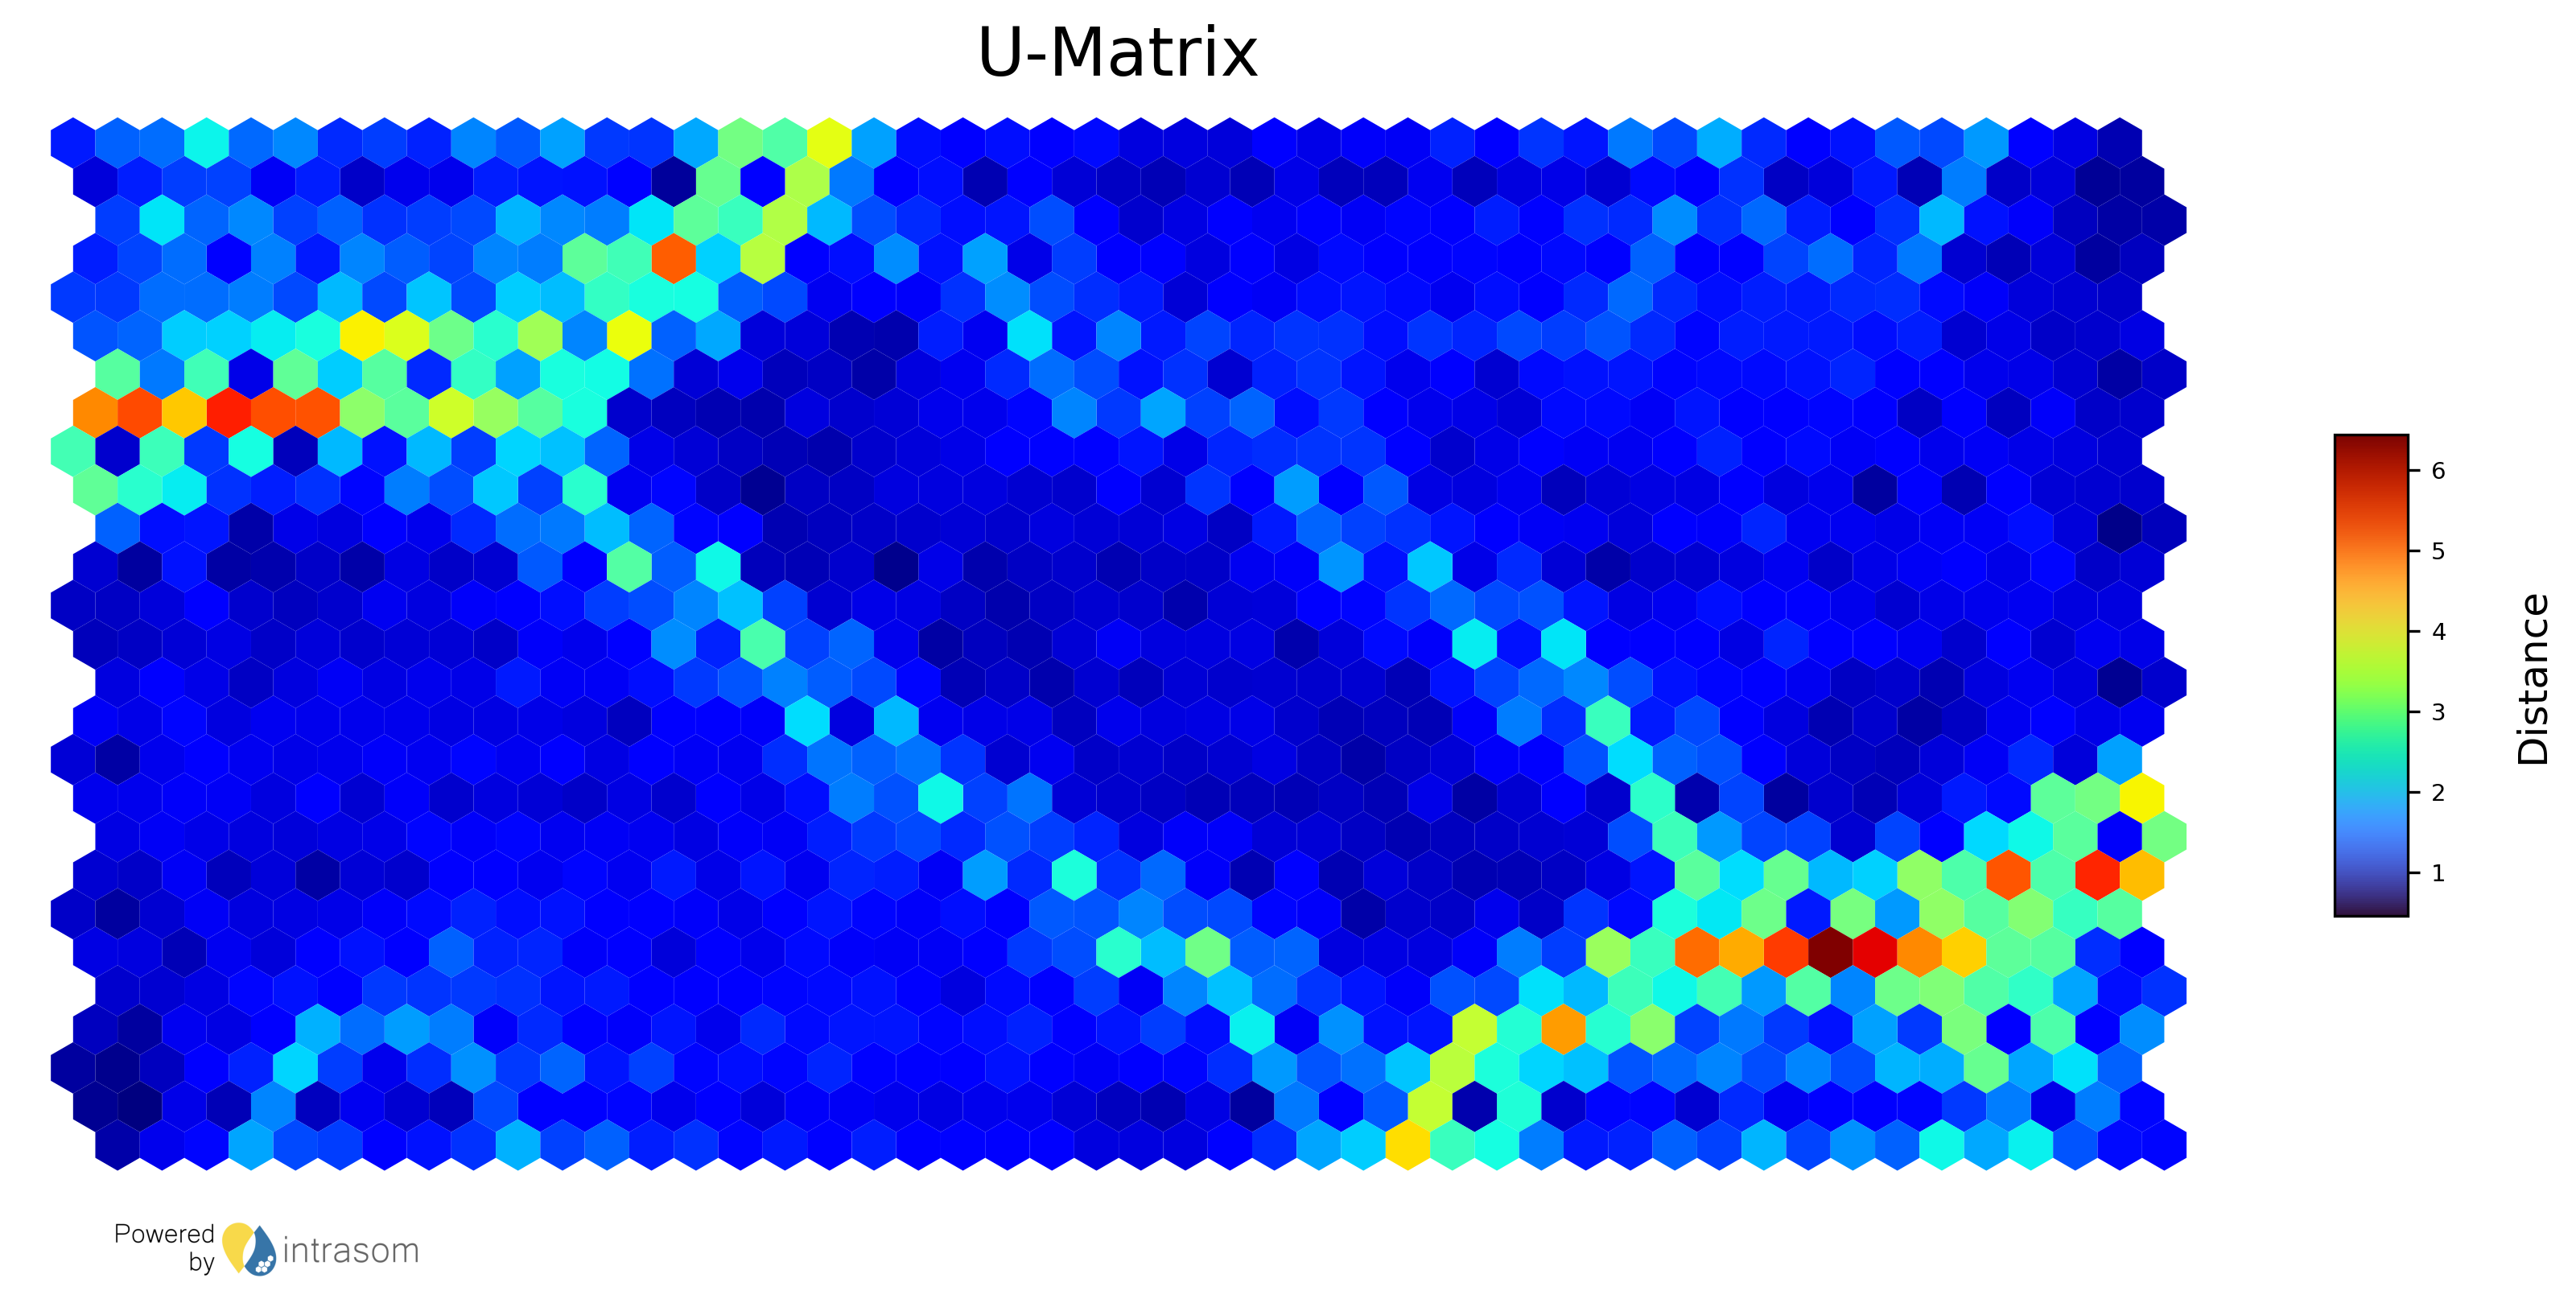

Saving.


In [14]:
plot = PlotFactory(som_syn_ctrl)

plot.plot_umatrix(figsize = (13,2.5),
                  hits = False,
                  title = "U-Matrix",
                  title_size = 20,
                  title_pad = 20,
                  legend_title = "Distance",
                  legend_title_size = 12,
                  legend_ticks_size = 7,
                  label_title_xy = (0,0.5),
                  watermark_neurons=False)

In [16]:
clustering_syn_ctrl = ClusterFactory(som_syn_ctrl)
clusters_syn_ctrl = clustering_syn_ctrl.kmeans(k=6)

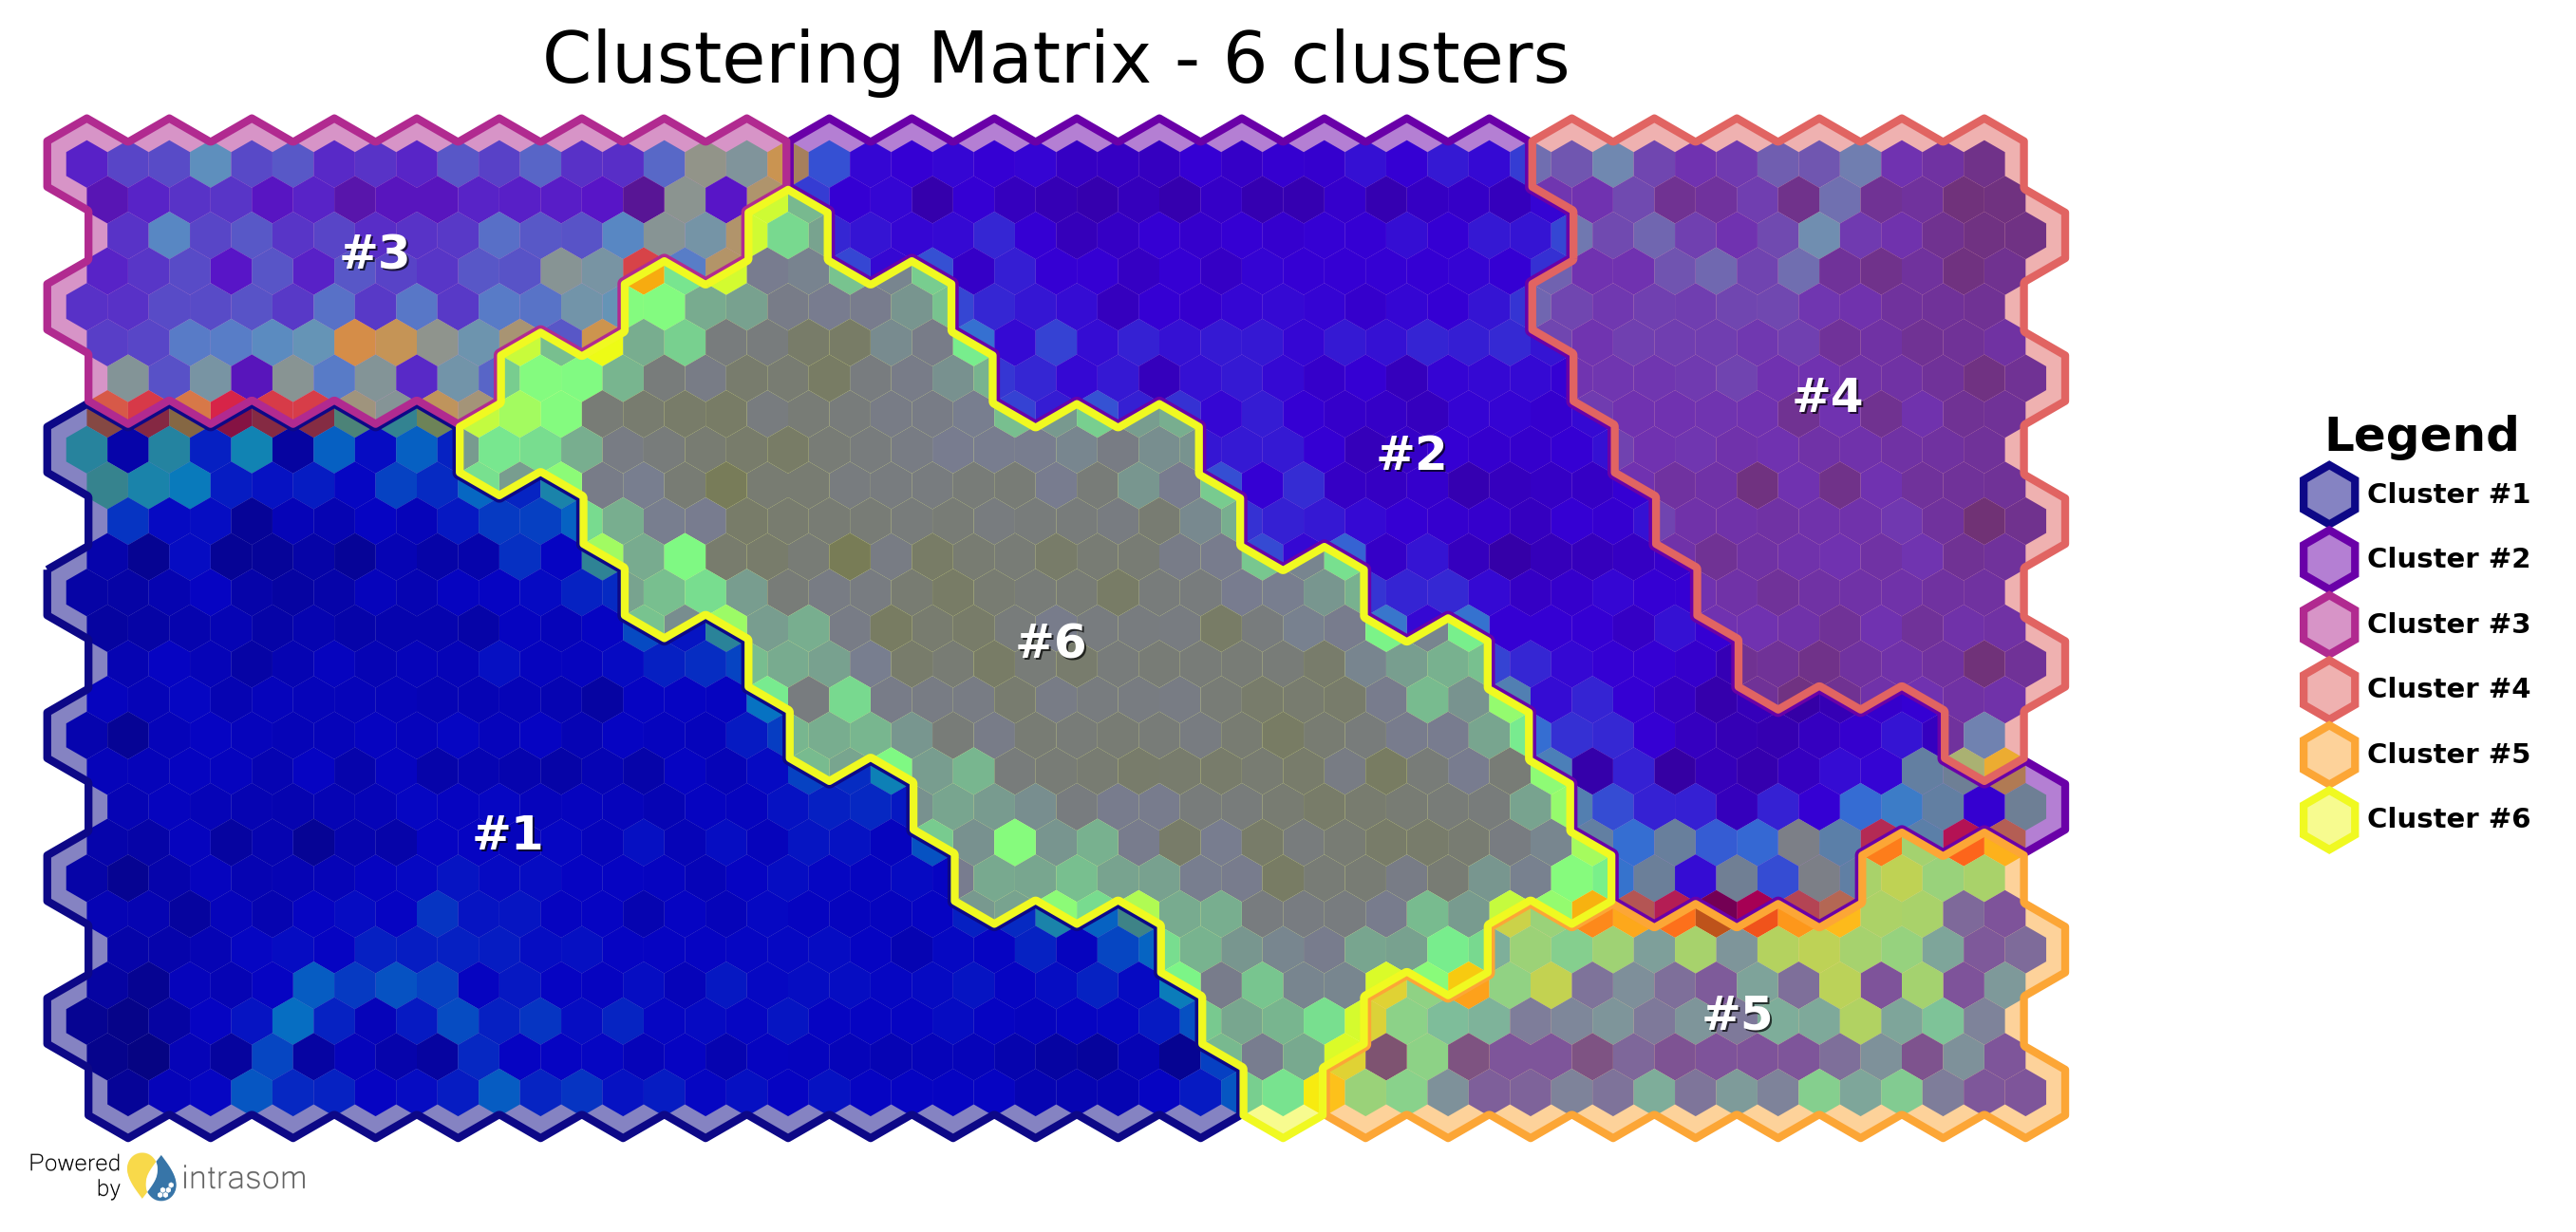

In [21]:
clustering_syn_ctrl.plot_kmeans(figsize = (12,5),
                                clusters = clusters_syn_ctrl,
                                title_size = 18,
                                title_pad = 20,
                                umatrix=True,
                                colormap = "plasma",
                                alfa_clust=0.5,
                                hits=False,
                                legend_text_size =7,
                                plot_labels= True,
                                cluster_outline=True)

In [28]:
# Recuperando os clusters

som_clusters = clustering_syn_ctrl.results_cluster(clusters_syn_ctrl)['6_clusters'].values

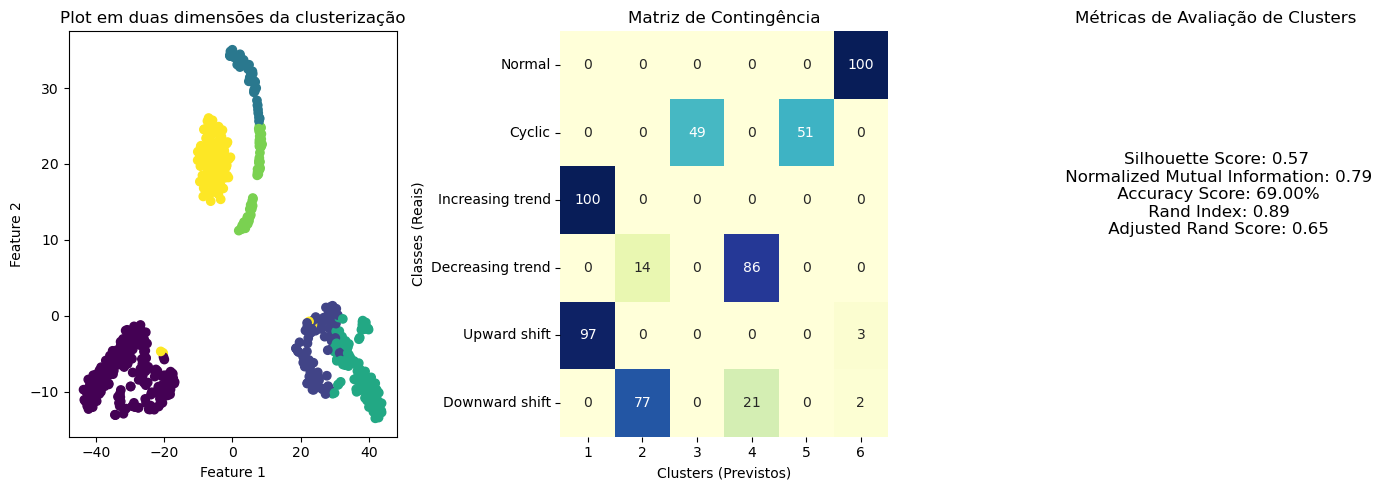

In [29]:
from sklearn.manifold import TSNE

X_syn_ctrl_2d = TSNE().fit_transform(X_syn_ctrl)

plot_cluster_evaluation(X_syn_ctrl_2d, y_syn_ctrl, som_clusters, syn_ctrl_target_names)